In [1]:
import pandas as pd

In [2]:
import os

departure = 'LEMD'
destinations = [
    'LECO',
    'LEAB',
    'LEAL',
    'LEAM',
    'LEAS',
    'LEBZ',
    'LEBL',
    'LEBB',
    'LEBG',
    'LECH',
    'LEGE',
    'LEGR',
    'LEHC',
    'LEJR',
    'LESU',
    'LEDA',
    'LELO'
]

root_path = os.getcwd()
flights_path = os.path.join(root_path, 'Flights')
flights_points_path = os.path.join(root_path, 'Flight_Points')
flights_filename = os.path.join(root_path, 'flights.csv')
flights_points_filename = os.path.join(root_path, 'flight_points.csv')

In [3]:
flights = []

for root, dirs, files in os.walk(flights_path, topdown=False):
   for name in files:
      filepath = os.path.join(root, name)
      print(filepath)
      dataset = pd.read_csv(filepath, compression='gzip')
      # Filter -  Vuelos entre Madrid y Barcelona
      flights = dataset[(dataset['ADEP'] == departure) & (dataset['ADES'].isin(destinations))]

/Users/rodrigo/Proyectos/TFM/Flights/Flights_20150301_20150331.csv.gz


In [4]:
flights

,ECTRL ID,ADEP,ADEP Latitude,ADEP Longitude,ADES,ADES Latitude,ADES Longitude,FILED OFF BLOCK TIME,FILED ARRIVAL TIME,ACTUAL OFF BLOCK TIME,ACTUAL ARRIVAL TIME,AC Type,AC Operator,AC Registration,ICAO Flight Type,STATFOR Market Segment,Requested FL,Actual Distance Flown (nm)
1633,184409729,LEMD,40.47222,-3.56083,LEAL,38.28222,-0.55806,01-03-2015 05:50:00,01-03-2015 07:11:16,01-03-2015 05:50:00,01-03-2015 07:09:58,AT72,AEA,ECLST,S,Traditional Scheduled,170.0,242
2018,184410122,LEMD,40.47222,-3.56083,LEBB,43.30111,-2.91056,01-03-2015 06:10:00,01-03-2015 06:59:08,01-03-2015 06:03:00,01-03-2015 06:56:06,E190,AEA,ECLFZ,S,Traditional Scheduled,360.0,197
2536,184410652,LEMD,40.47222,-3.56083,LEBL,41.29694,2.07833,01-03-2015 06:45:00,01-03-2015 07:53:06,01-03-2015 06:51:00,01-03-2015 08:00:31,A321,IBE,ECJEJ,S,Traditional Scheduled,300.0,301
2572,184410691,LEMD,40.47222,-3.56083,LEBL,41.29694,2.07833,01-03-2015 06:50:00,01-03-2015 08:01:04,01-03-2015 06:42:00,01-03-2015 07:51:01,A332,AEA,ECJPF,S,Traditional Scheduled,300.0,301
2935,184411079,LEMD,40.47222,-3.56083,LEBL,41.29694,2.07833,01-03-2015 07:15:00,01-03-2015 08:19:58,01-03-2015 07:18:00,01-03-2015 08:24:19,A320,VLG,ECJTQ,S,Lowcost,300.0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696455,185166325,LEMD,40.47222,-3.56083,LEJR,36.74472,-6.06000,31-03-2015 19:35:00,31-03-2015 20:39:19,31-03-2015 19:44:00,31-03-2015 20:45:05,CRJX,ANE,ECLJT,S,Traditional Scheduled,310.0,298
696478,185166348,LEMD,40.47222,-3.56083,LEAL,38.28222,-0.55806,31-03-2015 19:35:00,31-03-2015 20:35:01,31-03-2015 19:31:00,31-03-2015 20:29:27,CRJ9,ANE,ECJTT,S,Traditional Scheduled,290.0,222
696766,185166642,LEMD,40.47222,-3.56083,LEAS,43.56361,-6.03472,31-03-2015 19:55:00,31-03-2015 20:51:33,31-03-2015 19:53:00,31-03-2015 20:49:03,A320,IBE,ECLVD,S,Traditional Scheduled,320.0,241
696778,185166655,LEMD,40.47222,-3.56083,LECO,43.30194,-8.37722,31-03-2015 19:55:00,31-03-2015 20:54:44,31-03-2015 19:59:00,31-03-2015 21:00:04,A320,IBE,ECILS,S,Traditional Scheduled,310.0,285


In [5]:
trayectos_table = flights.groupby(['ADEP', 'ADES']).size().reset_index()
trayectos_table.columns = ['ADEP', 'ADES', 'Trayectos']

trayectos_table

,ADEP,ADES,Trayectos
0,LEMD,LEAL,181
1,LEMD,LEAM,126
2,LEMD,LEAS,137
3,LEMD,LEBB,320
4,LEMD,LEBL,757
5,LEMD,LEBZ,27
6,LEMD,LECO,234
7,LEMD,LEGR,134
8,LEMD,LEJR,128


In [6]:
flight_points = []

for root, dirs, files in os.walk(flights_points_path, topdown=False):
   for name in files:
      filepath = os.path.join(root, name)
      print(filepath)
      dataset = pd.read_csv(filepath, compression='gzip')
      # Filter - Puntos que pertenezcan a alguno de los vuelos guardados arriba
      flight_points = dataset[dataset['ECTRL ID'].isin(flights['ECTRL ID'])]

/Users/rodrigo/Proyectos/TFM/Flight_Points/flight_points.csv.gz


In [7]:
flight_points

,ECTRL ID,Sequence Number,Time Over,Flight Level,Latitude,Longitude
61136,184409729,0,01-03-2015 05:50:00,0,40.47222,-3.56083
61137,184409729,1,01-03-2015 06:06:00,0,40.47222,-3.56083
61138,184409729,2,01-03-2015 06:07:38,45,40.55250,-3.55361
61139,184409729,3,01-03-2015 06:11:46,99,40.72250,-3.38167
61140,184409729,4,01-03-2015 06:19:00,155,40.25278,-3.34806
...,...,...,...,...,...,...
18480944,185166735,6,31-03-2015 20:25:34,250,39.78083,-3.46417
18480945,185166735,7,31-03-2015 20:32:33,250,39.00000,-3.22139
18480946,185166735,8,31-03-2015 20:40:29,250,38.15250,-3.62500
18480947,185166735,9,31-03-2015 20:51:12,46,37.18306,-3.99083


In [8]:
from utils.trajectories import df_to_trajectories

# Preparar los datos, transforma tus datos de puntos a trayectorias
trajectories = df_to_trajectories(flight_points)

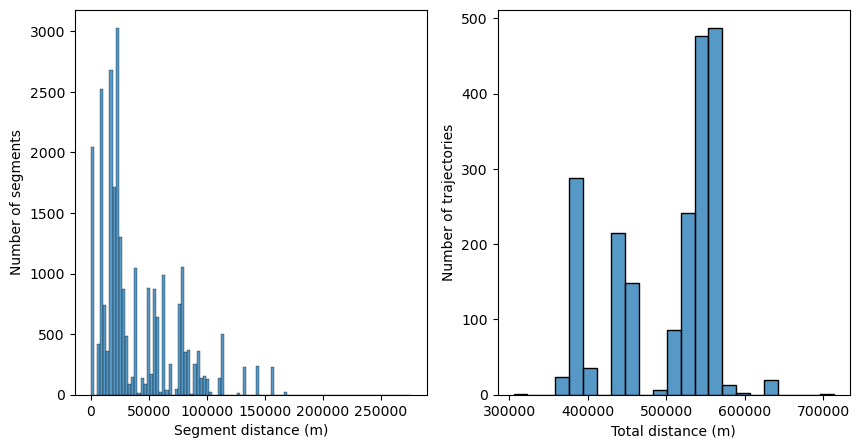

In [9]:
from utils.distances import calculate_total_distance, calculate_point_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula las distancias totales y los tramos entre puntos para cada trayectoria
total_distances = []
point_distances = []
for trajectory in trajectories:
    total_distances.append(calculate_total_distance(trajectory))
    point_distances.extend(calculate_point_distances(trajectory))


# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Crea el primer histograma con las distancias de los tramos entre puntos
sns.histplot(point_distances, ax=ax)
ax.set_xlabel('Segment distance (m)')
ax.set_ylabel('Number of segments')

# Crea el segundo histograma con las distancias totales de las trayectorias
sns.histplot(total_distances, ax=ax2)
ax2.set_xlabel('Total distance (m)')
ax2.set_ylabel('Number of trajectories')

plt.savefig('graphs/trajectories/initial_distribution.png', dpi=300)
plt.show()

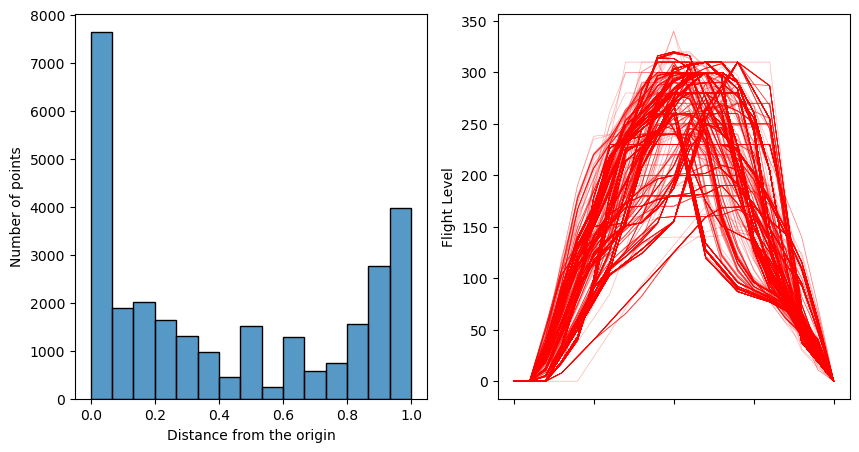

In [10]:
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [trajectory for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig('graphs/trajectories/first_normalization_distribution.png', dpi=300)
plt.show()

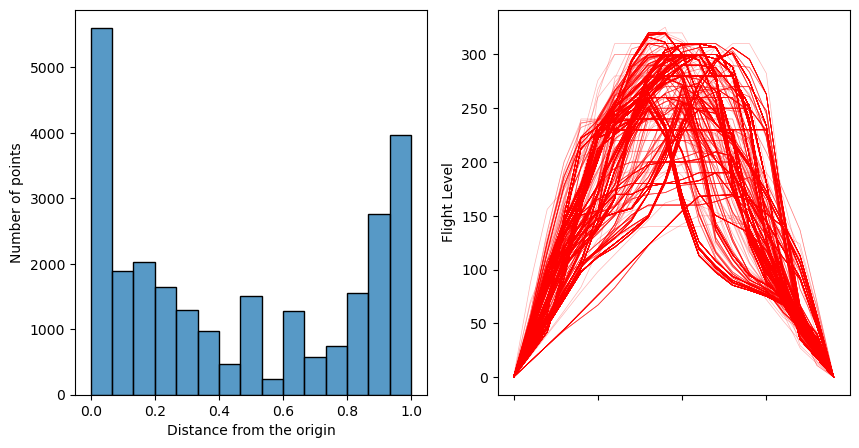

In [11]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.savefig('graphs/trajectories/taxi_normalization_distribution.png', dpi=300)
plt.show()

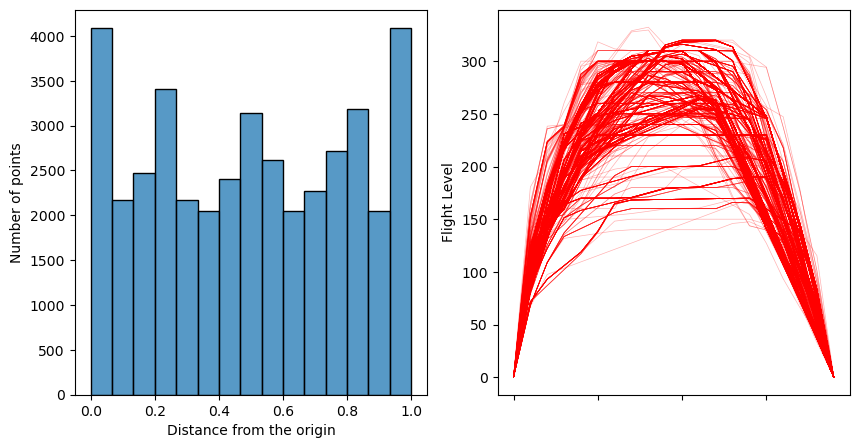

In [12]:
from utils.trajectories import remove_taxi
from utils.graphs import accumulated_distance, altitude_profile
from utils.trajectories import interpolate_trajectory

normalized_trajectories = [remove_taxi(trajectory) for trajectory in trajectories]
points_num = max([len(trajectory) for trajectory in normalized_trajectories])
interpolated_trajectories = [interpolate_trajectory(trajectory, points_num) for trajectory in normalized_trajectories]

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(interpolated_trajectories, ax)

altitude_profile(interpolated_trajectories, ax2)

plt.savefig('graphs/trajectories/interpolation_distribution.png', dpi=300)
plt.show()

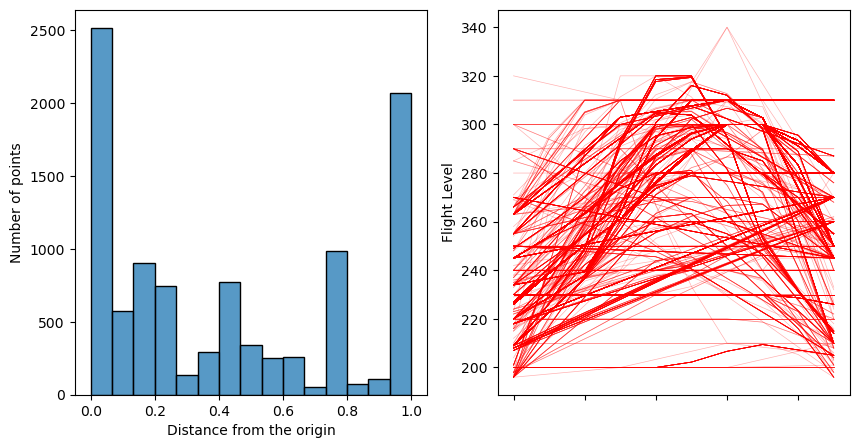

In [13]:
from utils.trajectories import remove_taxi, remove_under_FL195
from utils.graphs import accumulated_distance, altitude_profile

filtered_trajectories = [remove_under_FL195(remove_taxi(trajectory)) for trajectory in trajectories]
filtered_trajectories = list(filter(bool, filtered_trajectories))

# Crea una figura con dos subtramas
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))

accumulated_distance(filtered_trajectories, ax)

altitude_profile(filtered_trajectories, ax2)

plt.show()